<a href="https://colab.research.google.com/github/akita-NITH/dsp/blob/main/%E3%83%87%E3%82%A3%E3%82%B8%E3%82%BF%E3%83%AB%E4%BF%A1%E5%8F%B7%E5%87%A6%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ディジタル信号処理

# 自由空間損失を計算するプログラム

Frequency[Hz]:2400000000
Max Distance[m]:1000


TypeError: ignored

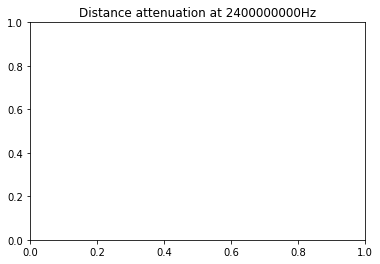

In [14]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

SPEED_OF_LIGHT = 299792458.0    # 光速[m/s]

# 減衰値計算
def CalcPathLoss(freq, d):
    _lambda = SPEED_OF_LIGHT / freq   # 波長計算
    loss = (4.0*np.pi*d/_lambda)**2
    return loss

def PlotPathLoss(freq, dist, loss):
    plt.figure()
    ax = plt.gca()
    title = "Distance attenuation at %dHz"%(freq)
    plt.title(title)
    ax.axes.xaxis.set_visible(True)
    ax.axes.yaxis.set_visible(True)
    
    plt.grid(True)
    plt.xlabel('distance[m]')
    plt.ylabel('pathloss[dB]')
    plt.grid = True
    plt.plot(dist, loss, drawstyle='steps-post')
    plt.show()

# メイン
if __name__ == "__main__":
    print("Frequency[Hz]:", end='')
    freq = float(input())
    print("Max Distance[m]:", end='')
    dist = float(input())
    d = np.arange(dist/1000.0,dist,dist/1000.0)
    loss = CalcPathLoss(freq, d)
    loss_db = -10.0*np.log10(loss)
    PlotPathLoss(freq, d, loss_db)